# EXP - 9

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv("/home/s5ad2/Downloads/Social_Network_Ads.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
data.drop(columns=['User ID'],inplace=True)

In [5]:
data.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])


In [13]:
x=data[['Gender','Age','EstimatedSalary']]
y=data[['Purchased']]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.10,random_state=20)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [17]:
y_pred=knn.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
original_accuracy=accuracy_score(y_test,y_pred)
print(f'Original accuracy : {original_accuracy:.2f}')

Original accuracy : 0.97


In [20]:
from sklearn.metrics import classification_report
report= classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.93      0.96        14

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [22]:
correct_prediction=0
wrong_prediction=0
for i in range(len(y_test)):
    if y_test.values[i]==y_pred[i]:
        correct_prediction+=1
    else:
        wrong_prediction+=1
print(f"Correct Prediction : ",correct_prediction)
print(f"Wrong Prediction: ",wrong_prediction)

Correct Prediction :  39
Wrong Prediction:  1


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

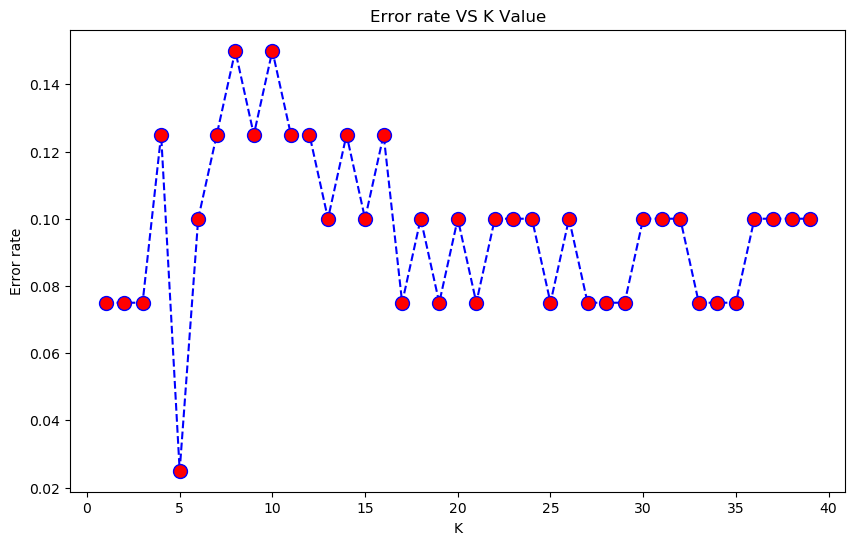

In [26]:
import matplotlib.pyplot as plt
error_rate=[]
k_values=range(1,40)

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error = 1-accuracy_score(y_test,y_pred)
    error_rate.append(error)
    
    
plt.figure(figsize=(10,6))
plt.plot(k_values,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate VS K Value")
plt.xlabel("K")
plt.ylabel("Error rate")
plt.show()